## Import case

In [1]:
import andes
import numpy as np
from andes.interop.pandapower import to_pandapower, make_link_table, runopp_map
from andes.interop.pandapower import add_gencost, build_group_table
andes.config_logger(stream_level=20)

import pandas as pd
import pandapower as pp
from math import ceil, floor

import os

import matplotlib.pyplot as plt

import scipy.stats as stat

from jams import rted2, dcopf

Package version

In [2]:
print(andes.__version__)
print(pp.__version__)

0.post4566.dev0+g690b111
2.9.0


Import ADNES case

In [3]:
# ss0 is used for PP conversion
dir_path = os.path.abspath('..')
case_path = '/case/npcc_ev.xlsx'
case_path = '/case/ieee39_ev2.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

Working directory: "/home/jwang175/andes/jwang/notes"
> Loaded config from file "/home/jwang175/.andes/andes.rc"
> Loaded generated Python code in "/home/jwang175/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 6 processes.


Saved generated pycode to "/home/jwang175/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.3024 seconds.
Parsing input file "/home/jwang175/andes/jwang/case/ieee39_ev2.xlsx"...
Input file parsed in 0.1149 seconds.
System internal structure set up in 0.0678 seconds.


In [4]:
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ssa.PQ.pq2z = 0

In [5]:
ssa.PFlow.run()
ssa.TDS.config.tf = 2
ssa.TDS.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.1193 seconds.
0: |F(x)| = 9.601680411
1: |F(x)| = 3.500722513
2: |F(x)| = 0.1835121365
3: |F(x)| = 0.0007752022182
4: |F(x)| = 1.764731161e-08
Converged in 5 iterations in 0.0167 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-2 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
Numba compilation initiated with caching.
GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_10 | 0.982  | 1    


GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.014  | 0.001
 GENROU_3  | 0.018  | 0.003
 GENROU_4  | 0.013 

  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=2.00 sec completed in 0.0776 seconds.


True

In [6]:
p0 = ssa.PQ.get(src='p0', idx='PQ_3')
print(p0)
ssa.PQ.set(src='Ppf', idx='PQ_3', value=p0*1.2, attr='v')

2.338


True

In [7]:
0.2 * 2.632 * 100 / 0.003

17546.666666666668

In [8]:
0.2 * 2.338 * 100 / 0.013

3596.9230769230776

In [9]:
ssa.TDS.config.tf = 20
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=20.00 sec completed in 1.5905 seconds.


True

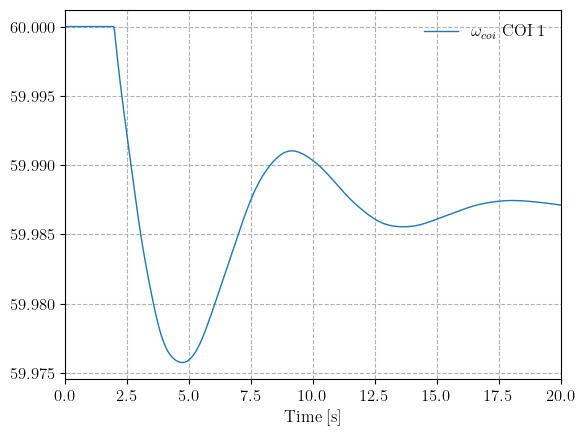

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: xlabel='Time [s]'>)

In [10]:
ssa.TDS.plt.plot(ssa.COI.omega,
                 ytimes=60, grid=True,
                 a=(0))

In [11]:
# pref0 = ssa.TGOV1N.get(src='pref0', idx='TGOV1_22')
# print(pref0)
# ssa.TurbineGov.set(src='pref0', idx='TGOV1_22', value=p0 + pref0, attr='v')

In [12]:
ssa.TDS.config.tf = 40
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=40.00 sec completed in 1.4423 seconds.


True